In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
nycgreentaxi=pd.read_parquet(r"C:\Users\91630\Desktop\Sem-VI\PA\Untitled Folder\PA-Project\green_tripdata_2022-08.parquet")

In [69]:
nycgreentaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65929 entries, 0 to 65928
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               65929 non-null  int64         
 1   lpep_pickup_datetime   65929 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  65929 non-null  datetime64[ns]
 3   store_and_fwd_flag     60028 non-null  object        
 4   RatecodeID             60028 non-null  float64       
 5   PULocationID           65929 non-null  int64         
 6   DOLocationID           65929 non-null  int64         
 7   passenger_count        60028 non-null  float64       
 8   trip_distance          65929 non-null  float64       
 9   fare_amount            65929 non-null  float64       
 10  extra                  65929 non-null  float64       
 11  mta_tax                65929 non-null  float64       
 12  tip_amount             65929 non-null  float64       
 13  t

In [70]:
nycgreentaxi=nycgreentaxi.drop(["ehail_fee","fare_amount"],axis=1) 

In [71]:
# Create New variable "trip_duration"
nycgreentaxi["trip_duration"]=nycgreentaxi.lpep_dropoff_datetime-nycgreentaxi.lpep_pickup_datetime

In [72]:
nycgreentaxi.trip_duration.head()

0   0 days 00:13:02
1   0 days 00:06:47
2   0 days 00:11:39
3   0 days 00:32:16
4   0 days 00:22:00
Name: trip_duration, dtype: timedelta64[ns]

In [73]:
# Convert timedelta into minutes
nycgreentaxi["trip_duration"]=nycgreentaxi["trip_duration"].dt.total_seconds()/60

In [74]:
nycgreentaxi["weekday"]=nycgreentaxi["lpep_dropoff_datetime"].dt.day_name()

In [75]:
nycgreentaxi["weekday"].value_counts(dropna=False)

weekday
Wednesday    11100
Tuesday      10943
Monday       10758
Thursday      9217
Friday        9085
Saturday      7827
Sunday        6999
Name: count, dtype: int64

In [76]:
nycgreentaxi["hour"]=nycgreentaxi["lpep_dropoff_datetime"].dt.hour

In [77]:
nycgreentaxi["hour"].value_counts(dropna=False)

hour
18    5208
17    4794
16    4691
15    4426
19    4342
12    3926
14    3860
11    3770
9     3763
10    3737
13    3541
20    3150
8     3056
21    2586
22    2183
7     2052
23    1921
0     1432
6      925
1      897
2      591
5      384
4      363
3      331
Name: count, dtype: int64

In [78]:
# f) Missing Values Imputation
# Numeric columns - fill with median
num_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
            'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 
            'trip_duration', 'passenger_count', 'RatecodeID', 'payment_type', 'trip_type']
for col in num_cols:
    if col in nycgreentaxi.columns and nycgreentaxi[col].isnull().sum() > 0:
        nycgreentaxi[col] = nycgreentaxi[col].fillna(nycgreentaxi[col].median())

In [79]:
# Categorical columns - fill with mode
cat_cols = ['store_and_fwd_flag', 'weekday', 'hourofday']
for col in cat_cols:
    if col in nycgreentaxi.columns and nycgreentaxi[col].isnull().sum() > 0:
        nycgreentaxi[col] = nycgreentaxi[col].fillna(nycgreentaxi[col].mode()[0])

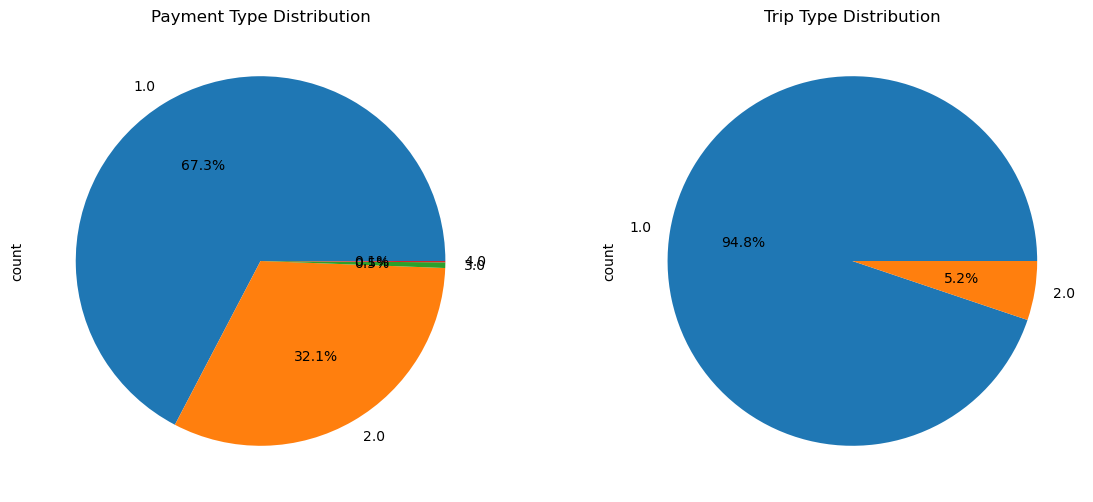

In [80]:
# g) Pie diagrams
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
nycgreentaxi['payment_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Payment Type Distribution')
nycgreentaxi['trip_type'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Trip Type Distribution')
plt.show()

weekday
Monday       19.324844
Tuesday      19.655488
Friday       19.744971
Thursday     19.767839
Wednesday    19.784017
Saturday     20.550268
Sunday       21.415757
Name: total_amount, dtype: float64


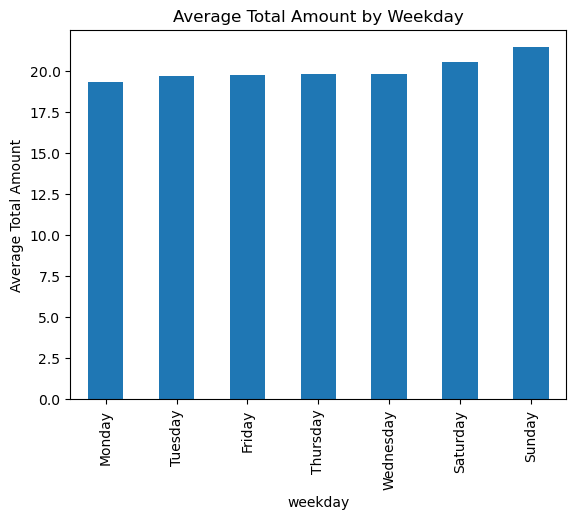

In [81]:
# h) Groupby average total_amount by weekday
weekday_avg = nycgreentaxi.groupby('weekday')['total_amount'].mean().sort_values()
print(weekday_avg)
weekday_avg.plot(kind='bar')
plt.title('Average Total Amount by Weekday')
plt.ylabel('Average Total Amount')
plt.show()

payment_type
3.0     2.881358
4.0     3.419211
2.0    16.826565
1.0    21.581739
Name: total_amount, dtype: float64


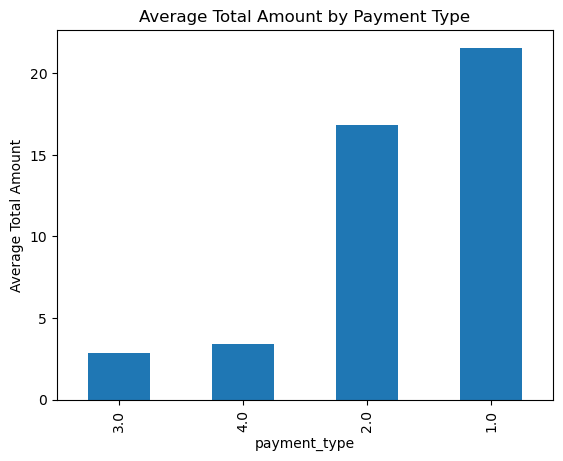

In [82]:
# i) Groupby average total_amount by payment_type
payment_avg = nycgreentaxi.groupby('payment_type')['total_amount'].mean().sort_values()
print(payment_avg)
payment_avg.plot(kind='bar')
plt.title('Average Total Amount by Payment Type')
plt.ylabel('Average Total Amount')
plt.show()

weekday
Monday       1.898470
Thursday     1.942018
Tuesday      1.970461
Friday       1.979278
Wednesday    1.990084
Saturday     2.054978
Sunday       2.217805
Name: tip_amount, dtype: float64


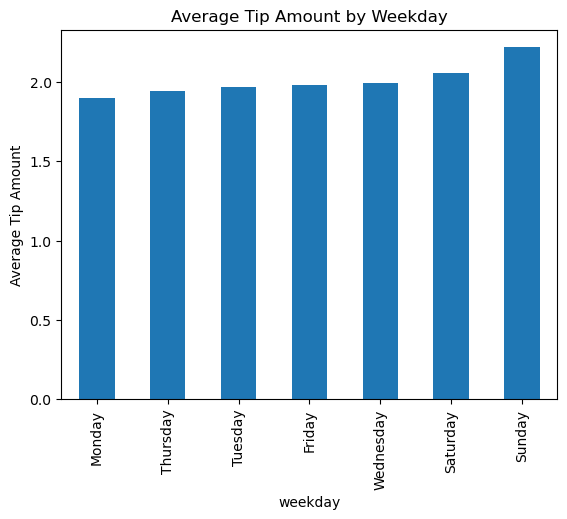

In [83]:
# j) Groupby average tip_amount by weekday
weekday_tip = nycgreentaxi.groupby('weekday')['tip_amount'].mean().sort_values()
print(weekday_tip)
weekday_tip.plot(kind='bar')
plt.title('Average Tip Amount by Weekday')
plt.ylabel('Average Tip Amount')
plt.show()

payment_type
3.0   -0.009105
2.0    0.000000
4.0    0.000000
1.0    2.963831
Name: tip_amount, dtype: float64


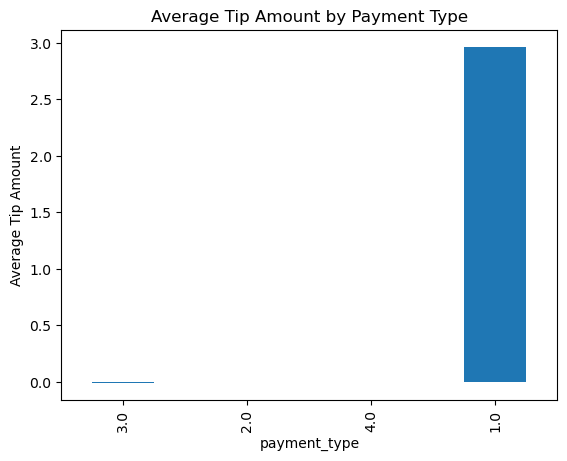

In [84]:
# k) Groupby average tip_amount by payment_type
payment_tip = nycgreentaxi.groupby('payment_type')['tip_amount'].mean().sort_values()
print(payment_tip)
payment_tip.plot(kind='bar')
plt.title('Average Tip Amount by Payment Type')
plt.ylabel('Average Tip Amount')
plt.show()

In [85]:
# l) Test null hypothesis: average total_amount of different trip_type is identical
trip_type_groups = [nycgreentaxi[nycgreentaxi['trip_type'] == i]['total_amount'] for i in nycgreentaxi['trip_type'].unique()]
f_val, p_val = stats.f_oneway(*trip_type_groups)
print(f"ANOVA test for trip_type: F-value = {f_val}, p-value = {p_val}")

ANOVA test for trip_type: F-value = 6076.094569443618, p-value = 0.0


In [86]:
# m) Test null hypothesis: average total_amount of different weekday is identical
weekday_groups = [nycgreentaxi[nycgreentaxi['weekday'] == day]['total_amount'] for day in nycgreentaxi['weekday'].unique()]
f_val, p_val = stats.f_oneway(*weekday_groups)
print(f"ANOVA test for weekday: F-value = {f_val}, p-value = {p_val}")

ANOVA test for weekday: F-value = 11.078176451348956, p-value = 2.1934693237251074e-12


In [87]:
# n) Test null hypothesis: no association between trip_type and payment_type
contingency_table = pd.crosstab(nycgreentaxi['trip_type'], nycgreentaxi['payment_type'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test: Chi2 = {chi2}, p-value = {p}")

Chi-square test: Chi2 = 142.42551890519954, p-value = 1.1335568004635876e-30


In [88]:
# o) Numeric variables analysis
num_vars = ['trip_distance', 'extra', 'mta_tax', 'tip_amount', 
            'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 
            'trip_duration', 'passenger_count', 'total_amount']

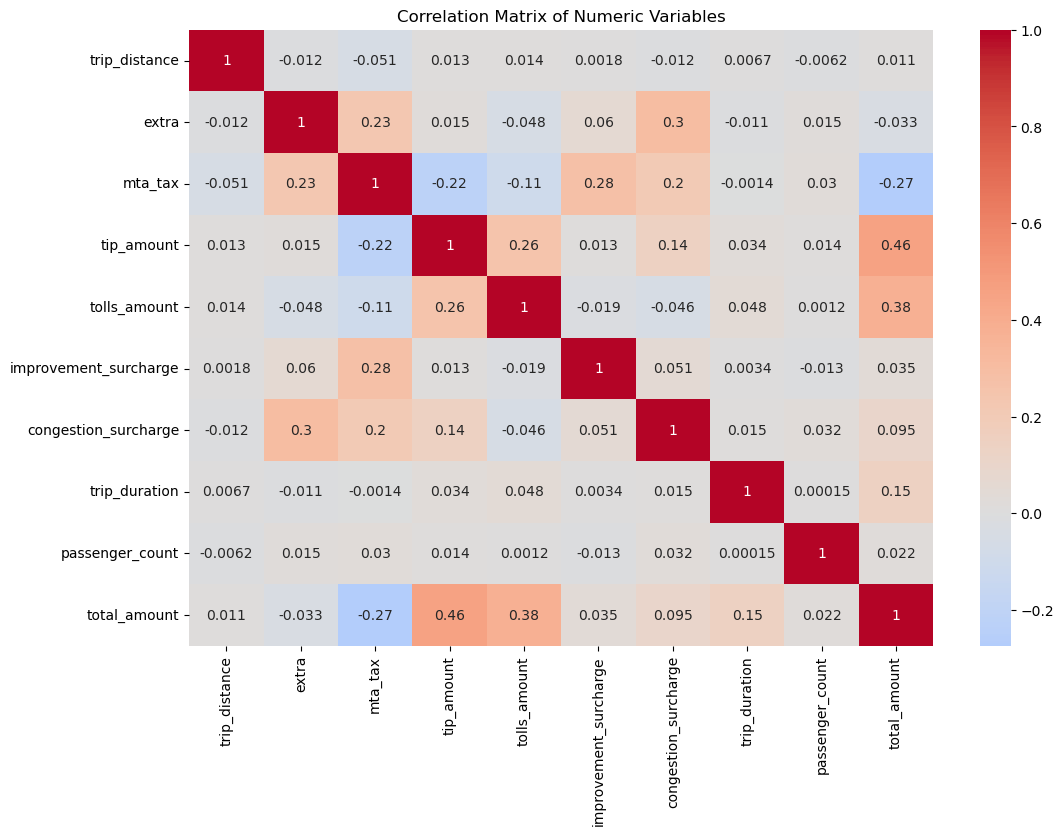

In [89]:
# Correlation matrix
corr_matrix = nycgreentaxi[num_vars].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


In [90]:
# p) Object variables analysis
obj_vars = ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type', 'weekday']

In [91]:
# q) Dummy encode object cols
nycgreen_encoded = pd.get_dummies(nycgreentaxi, columns=obj_vars, drop_first=True)

Text(0.5, 1.0, 'Histogram of Total Amount')

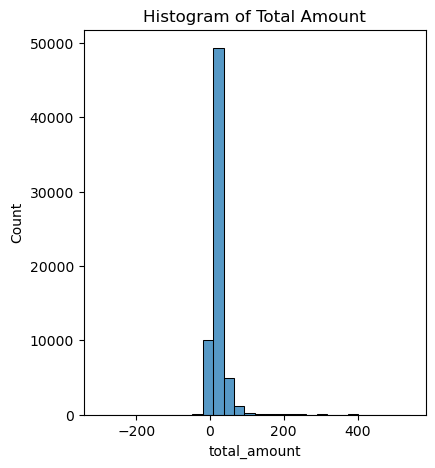

In [92]:
# r) Dependent Variable analysis - total_amount
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(nycgreentaxi['total_amount'], kde=False, bins=30)
plt.title('Histogram of Total Amount')

Text(0.5, 1.0, 'Boxplot of Total Amount')

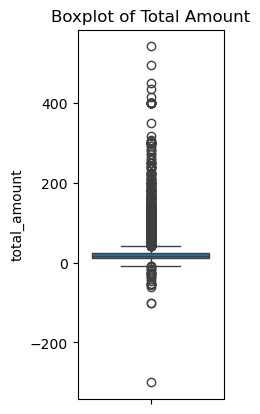

In [93]:
plt.subplot(1, 3, 2)
sns.boxplot(y=nycgreentaxi['total_amount'])
plt.title('Boxplot of Total Amount')

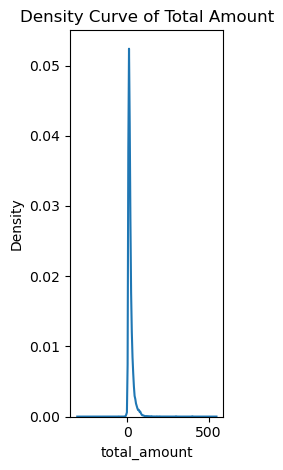

In [94]:
plt.subplot(1, 3, 3)
sns.kdeplot(nycgreentaxi['total_amount'])
plt.title('Density Curve of Total Amount')
plt.tight_layout()
plt.show()

In [95]:
# s) Regression Models
# Prepare data
X = nycgreen_encoded.drop(['total_amount', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'VendorID'], axis=1, errors='ignore')
y = nycgreen_encoded['total_amount']


In [96]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# 1. Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Linear Regression:
RMSE: 14.438155608148726
R2 Score: 0.4256859535070856


In [98]:
# 2. Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("\nDecision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Decision Tree:
RMSE: 12.944158264311573
R2 Score: 0.5383916771223133


In [99]:

# 3. Random Forest with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("\nRandom Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Random Forest:
RMSE: 9.562441409636376
R2 Score: 0.7480794612350405


In [100]:
# 4. Gradient Boosting with 100 trees
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("\nGradient Boosting:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")


Gradient Boosting:
RMSE: 10.608992900683353
R2 Score: 0.6899195971296663
